In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from functools import reduce
import re
import matplotlib.pyplot as plt
import datetime

In [2]:
df1 = pd.read_csv('data/amundi-msci-wrld-ae-c.csv')
df2 = pd.read_csv('data/ishares-global-corporate-bond-$.csv')
df3 = pd.read_csv('data/db-x-trackers-ii-global-sovereign-5.csv')
df4 = pd.read_csv('data/spdr-gold-trust.csv')
df5 = pd.read_csv('data/usdollar.csv')

In [3]:
def toDate(df):
    df['Date'] =  pd.to_datetime(df['Date'],format='%b %d, %Y')

In [4]:
toDate(df1)
toDate(df2)
toDate(df3)
toDate(df4)
toDate(df5)

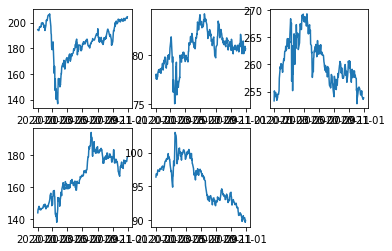

In [5]:
x = df1.Date
y = df1.Price

plt.subplot(2, 3, 1)
plt.plot(x,y)

x = df2.Date
y = df2.Price

plt.subplot(2, 3, 2)
plt.plot(x,y)

x = df3.Date
y = df3.Price

plt.subplot(2, 3, 3)
plt.plot(x,y)

x = df4.Date
y = df4.Price

plt.subplot(2, 3, 4)
plt.plot(x,y)

x = df5.Date
y = df5.Price

plt.subplot(2, 3, 5)
plt.plot(x,y)


plt.show()

In [6]:
df_list = [df1, df2, df3, df4, df5]
df_final = reduce(lambda left,right: pd.merge(left,right,on='Date', how='outer'), df_list)
df_final.drop(['Open_x', 'High_x', 'Low_x', 'Change %_x','Open_y', 'High_y', 'Low_y', 'Vol._x', 'Change %_y','Open_x', 'High_x', 'Low_x', 'Vol._y', 'Change %_x','Open_y', 'High_y', 'Low_y', 'Vol._x', 'Change %_y','Open','High', 'Low', 'Vol._y', 'Change %'],axis=1,inplace=True)
df_final.columns = ['Date','ST','CB','PB','GO','CA']
df_final

,Date,ST,CB,PB,GO,CA
0,2020-12-31,204.58,80.62,NaN,178.36,89.94
1,2020-12-30,203.32,80.42,253.84,177.70,89.68
2,2020-12-29,204.00,80.86,253.82,176.35,89.99
3,2020-12-28,204.02,NaN,253.55,175.71,90.34
4,2020-12-24,203.19,80.11,NaN,176.35,90.32
...,...,...,...,...,...,...
279,2020-05-02,NaN,NaN,NaN,159.78,NaN
280,2020-04-13,NaN,NaN,NaN,161.41,99.35
281,2020-12-25,NaN,NaN,NaN,NaN,90.32
282,2020-04-10,NaN,NaN,NaN,NaN,99.52


In [7]:
df_main=df_final.fillna(method='ffill',axis=0)
df_main=df_main.sort_values('Date',ascending=True,ignore_index=True)

In [8]:
df_main=df_main.mask(df_main=='Nan', None).ffill()

In [9]:
df_main.isnull().values.any()

False

In [10]:
df_main

,Date,ST,CB,PB,GO,CA
0,2020-01-01,194.59,79.43,259.95,161.41,96.39
1,2020-01-02,194.59,77.58,253.28,143.95,96.85
2,2020-01-03,194.12,78.03,255.12,145.86,96.84
3,2020-01-06,193.81,77.50,254.16,147.39,96.67
4,2020-01-07,194.30,77.73,254.36,147.97,97.00
...,...,...,...,...,...,...
279,2020-12-25,194.59,79.43,259.95,161.41,90.32
280,2020-12-28,204.02,80.86,253.55,175.71,90.34
281,2020-12-29,204.00,80.86,253.82,176.35,89.99
282,2020-12-30,203.32,80.42,253.84,177.70,89.68


### 3.1 Portfolio allocation

Portfolio allocation: automatic generation of portfolio allocations must be generated, where the ∆ or increment/decrement in each asset weight is 0.05 (5%). Note that the sum of asset weights for a portfolio mix must be always equal to 1.0 (100%). Table 3.6 shows the schema for portfolio generation.

In [11]:
asset_type=['Stock','CorpBond','PublicBond','Gold','Cash']


df = pd.DataFrame(columns=asset_type)


input_rows=[]
for a in range(21):
    for b in range(21-a):
        for c in range(21-a-b):
            for d in range(21-a-b-c):
                e=20-a-b-c-d
                #print([a*0.05,b*0.05,c*0.05,d*0.05,e*0.05])
                input_rows.append([a*0.05,b*0.05,c*0.05,d*0.05,e*0.05])
                


row_list = []

for row in input_rows:
    dict1 = dict(Stock=row[0], CorpBond=row[1],PublicBond=row[2], Gold=row[3],Cash=row[4])
    row_list.append(dict1)
df_allocations = pd.DataFrame(row_list)

df_allocations

,Stock,CorpBond,PublicBond,Gold,Cash
0,0.00,0.00,0.00,0.00,1.00
1,0.00,0.00,0.00,0.05,0.95
2,0.00,0.00,0.00,0.10,0.90
3,0.00,0.00,0.00,0.15,0.85
4,0.00,0.00,0.00,0.20,0.80
...,...,...,...,...,...
10621,0.95,0.00,0.00,0.00,0.05
10622,0.95,0.00,0.00,0.05,0.00
10623,0.95,0.00,0.05,0.00,0.00
10624,0.95,0.05,0.00,0.00,0.00


In [12]:
df=df_main
df

,Date,ST,CB,PB,GO,CA
0,2020-01-01,194.59,79.43,259.95,161.41,96.39
1,2020-01-02,194.59,77.58,253.28,143.95,96.85
2,2020-01-03,194.12,78.03,255.12,145.86,96.84
3,2020-01-06,193.81,77.50,254.16,147.39,96.67
4,2020-01-07,194.30,77.73,254.36,147.97,97.00
...,...,...,...,...,...,...
279,2020-12-25,194.59,79.43,259.95,161.41,90.32
280,2020-12-28,204.02,80.86,253.55,175.71,90.34
281,2020-12-29,204.00,80.86,253.82,176.35,89.99
282,2020-12-30,203.32,80.42,253.84,177.70,89.68


In [13]:
#data['PriceDate'] =  pd.to_datetime(data['PriceDate'], format='%m/%d/%Y')
#data = data.sort_values(by=['PriceDate'], ascending=[True])

df.set_index('Date', inplace=True)
print (df)


                ST     CB      PB      GO     CA
Date                                            
2020-01-01  194.59  79.43  259.95  161.41  96.39
2020-01-02  194.59  77.58  253.28  143.95  96.85
2020-01-03  194.12  78.03  255.12  145.86  96.84
2020-01-06  193.81  77.50  254.16  147.39  96.67
2020-01-07  194.30  77.73  254.36  147.97  97.00
...            ...    ...     ...     ...    ...
2020-12-25  194.59  79.43  259.95  161.41  90.32
2020-12-28  204.02  80.86  253.55  175.71  90.34
2020-12-29  204.00  80.86  253.82  176.35  89.99
2020-12-30  203.32  80.42  253.84  177.70  89.68
2020-12-31  204.58  80.62  253.84  178.36  89.94

[284 rows x 5 columns]


In [14]:
#filling missing dates->366 rows (also 29th-02)
df = df.resample('D').ffill().reset_index()
print (df)


          Date      ST     CB      PB      GO     CA
0   2020-01-01  194.59  79.43  259.95  161.41  96.39
1   2020-01-02  194.59  77.58  253.28  143.95  96.85
2   2020-01-03  194.12  78.03  255.12  145.86  96.84
3   2020-01-04  194.12  78.03  255.12  145.86  96.84
4   2020-01-05  194.12  78.03  255.12  145.86  96.84
..         ...     ...    ...     ...     ...    ...
361 2020-12-27  194.59  79.43  259.95  161.41  90.32
362 2020-12-28  204.02  80.86  253.55  175.71  90.34
363 2020-12-29  204.00  80.86  253.82  176.35  89.99
364 2020-12-30  203.32  80.42  253.84  177.70  89.68
365 2020-12-31  204.58  80.62  253.84  178.36  89.94

[366 rows x 6 columns]


### 3.2 Trading methodology

for the different portfolio allocations generated previously, apply
the trading methodologies, shown in Table 3.5, with and without rebalancing.
As part of this subtask, trading methodologies generated should be stored in the file trading_methodologies.csv in order to be used in later tasks and also to allow indi- vidual validation of this subtask.

amount = money_in*decided_percentage
n_shares = (amount/price_in)
earning= (#shares*price_out)

In [15]:
def rebalancing(date_in,shares,allocation,value_t0,n_months):

    date_in = (date_in.replace(day=15) )
    print('date considered is now: ',date_in)   
    price = df.loc[df['Date'] == str(date_in)]
  
    #price=month_price(1,date_in)  
    price_out=price.iloc[:,1:]
    #print(price_out)
    
    percentage_t0=allocation#np.array([50, 20, 0, 30, 0])#  

    value_t1=np.multiply(shares, price_out)


    sum_value_t1=float(value_t1.sum(axis=1))#103,1
    
    if(n_months>0):
        percentage_t1=((value_t1*(100/n_months))/sum_value_t1)/100
    else:
        percentage_t1=((value_t1*(100))/sum_value_t1)/100
    #print("percentage_t0: ",percentage_t0)
    #print("percentage_t1: ", percentage_t1)

    value_tr2=value_t1*percentage_t0/percentage_t1

    #print("value tr2: ",value_tr2)
    sum_value_tr2=float(value_tr2.sum(axis=1))#103,1
       
    if(n_months>0):
        percentage_tr2=((value_tr2*(100/n_months))/sum_value_tr2)/100
    else:
        percentage_tr2=((value_tr2*(100))/sum_value_tr2)/100
    #print("percentage tr2: ",percentage_tr2)

    data={'Asset':['ST', 'CB', 'PB', 'GO', 'CA'],
         '$_t0':value_t0,
         '%_t0':percentage_t0,
         '$_t1':value_t1.iloc[0],
         '%_t1':percentage_t1.iloc[0],
         '$_tr2':value_tr2.iloc[0],
         '%_tr2':percentage_tr2.iloc[0],
          }

    portfolio_rebalancing=pd.DataFrame(data,columns=['$_t0','%_t0','$_t1','%_t1','$_tr2','%_tr2']).fillna(0)
    print( portfolio_rebalancing)

## 1-off BUY

In [16]:
money_in=100
allocation=np.array([.5, .2, .2, .1, 0])
date_in="2020-01-01"#optional

calculate 1-off shares at 2020.01.01

In [17]:

    date_in="2020-01-01"
    value_t0=money_in*allocation
    
    filtered_df = df.loc[df['Date'] == date_in]
    filtered_df=filtered_df.to_numpy()
    print(filtered_df)
    price=np.array([filtered_df[0,1],filtered_df[0,2],filtered_df[0,3],filtered_df[0,4],1])

    shares=value_t0/price


    data={'Asset':['ST', 'CB', 'PB', 'GO', 'CA'],
         'Amount':value_t0,
         'Asset price':price,
         '#shares':shares}

    one_off_investment = pd.DataFrame(data,columns=['Asset',  'Amount',  'Asset price', '#shares'])
    
    value_t1=np.multiply(shares, price)

    print(one_off_investment)
    print(date_in)
    print(value_t1)
    


[[Timestamp('2020-01-01 00:00:00') 194.59 79.43 259.95 161.41 96.39]]
  Asset  Amount  Asset price   #shares
0    ST    50.0       194.59  0.256951
1    CB    20.0        79.43  0.251794
2    PB    20.0       259.95  0.076938
3    GO    10.0       161.41  0.061954
4    CA     0.0         1.00  0.000000
2020-01-01
[50. 20. 20. 10.  0.]


In [18]:
print(shares)

[0.25695051 0.25179403 0.07693787 0.06195403 0.        ]


## 1-off  without rebalancing
name: df_one_off

In [19]:
one_off=[]
delta = datetime.timedelta(days=1)
date_in=datetime.date(2020,1,1)
for i in range(366):
    filtered_df = df.loc[df['Date'] == str(date_in)]
    filtered_df=filtered_df.to_numpy()
    price=np.array([filtered_df[0,1],filtered_df[0,2],filtered_df[0,3],filtered_df[0,4],1])
    value=np.multiply(shares, price)
    date_in+=delta
    one_off.append(value)

one_off=np.array(one_off)
df_one_off = pd.DataFrame(one_off)

# adding column name to the respective columns
df_one_off.columns =['one_off_ST', 'one_off_CB', 'one_off_PB', 'one_off_GO','one_off_CA']
print(df_one_off)

     one_off_ST  one_off_CB  one_off_PB  one_off_GO  one_off_CA
0     50.000000   20.000000   20.000000   10.000000         0.0
1     50.000000   19.534181   19.486824    8.918283         0.0
2     49.879233   19.647488   19.628390    9.036615         0.0
3     49.879233   19.647488   19.628390    9.036615         0.0
4     49.879233   19.647488   19.628390    9.036615         0.0
..          ...         ...         ...         ...         ...
361   50.000000   20.000000   20.000000   10.000000         0.0
362   52.423043   20.360065   19.507598   10.885943         0.0
363   52.417904   20.360065   19.528371   10.925593         0.0
364   52.243178   20.249276   19.529910   11.009231         0.0
365   52.566936   20.299635   19.529910   11.050121         0.0

[366 rows x 5 columns]


## 1-off  with rebalancing

In [20]:
from dateutil.relativedelta import relativedelta

allocation=np.array([.5, .2, .2, .1, 0])
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2020, 12, 31)
delta = relativedelta(months=1)
while start_date <= end_date:
    rebalancing(start_date,shares,allocation,value_t0,0)
    start_date += delta



date considered is now:  2020-01-15
    $_t0  %_t0       $_t1      %_t1      $_tr2  %_tr2
ST  50.0   0.5  50.560152  0.511111  49.461058    0.5
CB  20.0   0.2  19.763314  0.199787  19.784423    0.2
PB  20.0   0.2  19.519908  0.197326  19.784423    0.2
GO  10.0   0.1   9.078744  0.091777   9.892212    0.1
CA   0.0   0.0   0.000000  0.000000   0.000000    0.0
date considered is now:  2020-02-15
    $_t0  %_t0       $_t1      %_t1      $_tr2  %_tr2
ST  50.0   0.5  52.885554  0.517504  51.096717    0.5
CB  20.0   0.2  19.886693  0.194599  20.438687    0.2
PB  20.0   0.2  20.190037  0.197567  20.438687    0.2
GO  10.0   0.1   9.231150  0.090330  10.219343    0.1
CA   0.0   0.0   0.000000  0.000000   0.000000    0.0
date considered is now:  2020-03-15
    $_t0  %_t0       $_t1      %_t1      $_tr2  %_tr2
ST  50.0   0.5  40.104836  0.454446  44.124968    0.5
CB  20.0   0.2  19.501448  0.220980  17.649987    0.2
PB  20.0   0.2  19.766878  0.223987  17.649987    0.2
GO  10.0   0.1   8.876773  0

## DCA buy

In [21]:

money_in=100
allocation=np.array([.5, .2, .2, .1, 0])
date_in="2020-01-01"#optional

calculate DCA shares for every month

In [22]:
date_in=datetime.date(2020,1,1)
value_t0=money_in*allocation

#cycle and store the price of the different periods in a df
delta = datetime.timedelta(days=1)
frames=[]
for i in range(12):
    filtered_df = df.loc[df['Date'] == str(date_in)]
    frames.append(filtered_df)
    date_in = (date_in.replace(day=1) + datetime.timedelta(days=32)).replace(day=1)


months_price=pd.concat(frames)
periods=months_price.index
print(periods)
months_price=months_price.iloc[:,1:]#don't forget to change price of cash =1


#now work with weigh
amount_per_month=value_t0/12 

shares = amount_per_month/months_price

value_t0 =shares*months_price


data={'Date':periods,
      'Amount':np.full(12, money_in/12),
      'priceST':months_price.iloc[:,0],
      'priceCB':months_price.iloc[:,1],
      'pricePB':months_price.iloc[:,2],
      'priceGO':months_price.iloc[:,3],
      'priceCA':months_price.iloc[:,4],
      '%ST':value_t0.iloc[:,0],
      '%CB':value_t0.iloc[:,1],
      '%PB':value_t0.iloc[:,2],
      '%GO':value_t0.iloc[:,3],
      '%CA':value_t0.iloc[:,4],
      'shareST':shares.iloc[:,0],
      'shareCB':shares.iloc[:,1],
      'sharePB':shares.iloc[:,2],
      'shareGO':shares.iloc[:,3],
      'shareCA':shares.iloc[:,4]
     }
      

DCA_investment = pd.DataFrame(data,columns=['Date','Amount','priceST','priceCB','pricePB','priceGO','priceCA',
                                            '%ST','%CB', '%CB','%PB','%GO','%CA',
                                           'shareST','shareCB','sharePB', 'shareGO','shareCA'])
      

DCA_investment

Int64Index([0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335], dtype='int64')


,Date,Amount,priceST,priceCB,pricePB,priceGO,priceCA,%ST,%CB,%CB,%PB,%GO,%CA,shareST,shareCB,sharePB,shareGO,shareCA
0,0,8.333333,194.59,79.43,259.95,161.41,96.39,4.166667,1.666667,1.666667,1.666667,0.833333,0.0,0.021413,0.020983,0.006411,0.005163,0.0
31,31,8.333333,193.90,78.44,259.95,149.33,97.39,4.166667,1.666667,1.666667,1.666667,0.833333,0.0,0.021489,0.021248,0.006411,0.005580,0.0
60,60,8.333333,179.06,80.67,264.76,148.38,98.13,4.166667,1.666667,1.666667,1.666667,0.833333,0.0,0.023270,0.020660,0.006295,0.005616,0.0
91,91,8.333333,149.96,76.82,267.37,149.45,99.67,4.166667,1.666667,1.666667,1.666667,0.833333,0.0,0.027785,0.021696,0.006234,0.005576,0.0
121,121,8.333333,194.59,79.38,266.35,159.78,99.08,4.166667,1.666667,1.666667,1.666667,0.833333,0.0,0.021413,0.020996,0.006257,0.005216,0.0
152,152,8.333333,194.59,81.22,263.52,163.66,97.83,4.166667,1.666667,1.666667,1.666667,0.833333,0.0,0.021413,0.020520,0.006325,0.005092,0.0
182,182,8.333333,181.47,83.04,261.90,166.62,97.20,4.166667,1.666667,1.666667,1.666667,0.833333,0.0,0.022961,0.020071,0.006364,0.005001,0.0
213,213,8.333333,180.24,81.66,259.01,185.43,93.35,4.166667,1.666667,1.666667,1.666667,0.833333,0.0,0.023117,0.020410,0.006435,0.004494,0.0
244,244,8.333333,191.15,79.69,254.04,185.05,92.34,4.166667,1.666667,1.666667,1.666667,0.833333,0.0,0.021798,0.020914,0.006561,0.004503,0.0
274,274,8.333333,188.14,81.42,258.68,178.70,93.71,4.166667,1.666667,1.666667,1.666667,0.833333,0.0,0.022147,0.020470,0.006443,0.004663,0.0


In [23]:
shares.iloc[[1][0]]


ST    0.021489
CB    0.021248
PB    0.006411
GO    0.005580
CA    0.000000
Name: 31, dtype: float64

In [24]:
print(shares) #calculated shares per each month (index=day of the year in which the month changes)

           ST        CB        PB        GO   CA
0    0.021413  0.020983  0.006411  0.005163  0.0
31   0.021489  0.021248  0.006411  0.005580  0.0
60   0.023270  0.020660  0.006295  0.005616  0.0
91   0.027785  0.021696  0.006234  0.005576  0.0
121  0.021413  0.020996  0.006257  0.005216  0.0
152  0.021413  0.020520  0.006325  0.005092  0.0
182  0.022961  0.020071  0.006364  0.005001  0.0
213  0.023117  0.020410  0.006435  0.004494  0.0
244  0.021798  0.020914  0.006561  0.004503  0.0
274  0.022147  0.020470  0.006443  0.004663  0.0
305  0.022777  0.020614  0.006403  0.004729  0.0
335  0.020654  0.020683  0.006531  0.004897  0.0


## DCA  without rebalancing
name: df_DCA

### I don't know how to multiply all days of a month for the share of the month calculated previously

In [25]:
dca=[]
delta = datetime.timedelta(days=1)
date_in=datetime.date(2020,1,1)
for i in range (366):
    if (i<=shares.index[1]):
        filtered_df = df.loc[df['Date'] == str(date_in)]
        filtered_df=filtered_df.to_numpy()
        price=np.array([filtered_df[0,1],filtered_df[0,2],filtered_df[0,3],filtered_df[0,4],1])
        value=np.multiply(shares.iloc[[0][0]], price)
        date_in+=delta
        dca.append(value)
    elif(i<=shares.index[2]):
        filtered_df = df.loc[df['Date'] == str(date_in)]
        filtered_df=filtered_df.to_numpy()
        price=np.array([filtered_df[0,1],filtered_df[0,2],filtered_df[0,3],filtered_df[0,4],1])
        value=np.multiply(shares.iloc[[1][0]], price)
        date_in+=delta
        dca.append(value)
    elif(i<=shares.index[3]):
        filtered_df = df.loc[df['Date'] == str(date_in)]
        filtered_df=filtered_df.to_numpy()
        price=np.array([filtered_df[0,1],filtered_df[0,2],filtered_df[0,3],filtered_df[0,4],1])
        value=np.multiply(shares.iloc[[2][0]], price)
        date_in+=delta
        dca.append(value)
    elif(i<=shares.index[4]):
        filtered_df = df.loc[df['Date'] == str(date_in)]
        filtered_df=filtered_df.to_numpy()
        price=np.array([filtered_df[0,1],filtered_df[0,2],filtered_df[0,3],filtered_df[0,4],1])
        value=np.multiply(shares.iloc[[3][0]], price)
        date_in+=delta
        dca.append(value)
    elif(i<=shares.index[5]):
        filtered_df = df.loc[df['Date'] == str(date_in)]
        filtered_df=filtered_df.to_numpy()
        price=np.array([filtered_df[0,1],filtered_df[0,2],filtered_df[0,3],filtered_df[0,4],1])
        value=np.multiply(shares.iloc[[4][0]], price)
        date_in+=delta
        dca.append(value)
    elif(i<=shares.index[6]):
        filtered_df = df.loc[df['Date'] == str(date_in)]
        filtered_df=filtered_df.to_numpy()
        price=np.array([filtered_df[0,1],filtered_df[0,2],filtered_df[0,3],filtered_df[0,4],1])
        value=np.multiply(shares.iloc[[5][0]], price)
        date_in+=delta
        dca.append(value)
    elif(i<=shares.index[7]):
        filtered_df = df.loc[df['Date'] == str(date_in)]
        filtered_df=filtered_df.to_numpy()
        price=np.array([filtered_df[0,1],filtered_df[0,2],filtered_df[0,3],filtered_df[0,4],1])
        value=np.multiply(shares.iloc[[6][0]], price)
        date_in+=delta
        dca.append(value)
    elif(i<=shares.index[8]):
        filtered_df = df.loc[df['Date'] == str(date_in)]
        filtered_df=filtered_df.to_numpy()
        price=np.array([filtered_df[0,1],filtered_df[0,2],filtered_df[0,3],filtered_df[0,4],1])
        value=np.multiply(shares.iloc[[7][0]], price)
        date_in+=delta
        dca.append(value)
    elif(i<=shares.index[9]):
        filtered_df = df.loc[df['Date'] == str(date_in)]
        filtered_df=filtered_df.to_numpy()
        price=np.array([filtered_df[0,1],filtered_df[0,2],filtered_df[0,3],filtered_df[0,4],1])
        value=np.multiply(shares.iloc[[8][0]], price)
        date_in+=delta
        dca.append(value)
    elif(i<=shares.index[10]):
        filtered_df = df.loc[df['Date'] == str(date_in)]
        filtered_df=filtered_df.to_numpy()
        price=np.array([filtered_df[0,1],filtered_df[0,2],filtered_df[0,3],filtered_df[0,4],1])
        value=np.multiply(shares.iloc[[9][0]], price)
        date_in+=delta
        dca.append(value)
    elif(i<=shares.index[11]):
        filtered_df = df.loc[df['Date'] == str(date_in)]
        filtered_df=filtered_df.to_numpy()
        price=np.array([filtered_df[0,1],filtered_df[0,2],filtered_df[0,3],filtered_df[0,4],1])
        value=np.multiply(shares.iloc[[10][0]], price)
        date_in+=delta
        dca.append(value)
    else:
        filtered_df = df.loc[df['Date'] == str(date_in)]
        filtered_df=filtered_df.to_numpy()
        price=np.array([filtered_df[0,1],filtered_df[0,2],filtered_df[0,3],filtered_df[0,4],1])
        value=np.multiply(shares.iloc[[11][0]], price)
        date_in+=delta
        dca.append(value)
        
dca=np.array(dca)
df_dca=pd.DataFrame(dca,columns =['dca_ST', 'dca_CB', 'dca_PB', 'dca_GO','dca_CA'])
print(df_dca)


       dca_ST    dca_CB    dca_PB    dca_GO  dca_CA
0    4.166667  1.666667  1.666667  0.833333     0.0
1    4.166667  1.627848  1.623902  0.743190     0.0
2    4.156603  1.637291  1.635699  0.753051     0.0
3    4.156603  1.637291  1.635699  0.753051     0.0
4    4.156603  1.637291  1.635699  0.753051     0.0
..        ...       ...       ...       ...     ...
361  4.018993  1.642881  1.697688  0.790389     0.0
362  4.213757  1.672458  1.655891  0.860413     0.0
363  4.213344  1.672458  1.657654  0.863546     0.0
364  4.199299  1.663357  1.657785  0.870157     0.0
365  4.225323  1.667494  1.657785  0.873389     0.0

[366 rows x 5 columns]


## DCA  with rebalancing



In [26]:
i=0
allocation=np.array([.5, .2, .2, .1, 0])
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2020, 12, 31)
delta = relativedelta(months=1)
while start_date <= end_date:
    rebalancing(start_date,shares.iloc[i],(amount_per_month/100),value_t0.iloc[0,:],12)
    start_date += delta
    i+=1

date considered is now:  2020-01-15
        $_t0      %_t0      $_t1      %_t1     $_tr2     %_tr2
ST  4.166667  0.041667  4.213346  0.042593  4.121755  0.041667
CB  1.666667  0.016667  1.646943  0.016649  1.648702  0.016667
PB  1.666667  0.016667  1.626659  0.016444  1.648702  0.016667
GO  0.833333  0.008333  0.756562  0.007648  0.824351  0.008333
CA  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
date considered is now:  2020-02-15
        $_t0      %_t0      $_t1      %_t1     $_tr2     %_tr2
ST  4.166667  0.041667  4.422812  0.042782  4.307474  0.041667
CB  1.666667  0.016667  1.678140  0.016233  1.722990  0.016667
PB  1.666667  0.016667  1.682503  0.016275  1.722990  0.016667
GO  0.833333  0.008333  0.831492  0.008043  0.861495  0.008333
CA  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
date considered is now:  2020-03-15
        $_t0      %_t0      $_t1      %_t1     $_tr2     %_tr2
ST  4.166667  0.041667  3.631930  0.039542  3.827037  0.041667
CB  1.6666

Things that miss:

1) cleaning up DCA without rebalancing

2) store somehow the values of \$_tr2 that are the rebalance of each month for both the trading methodologies

3) once the $_tr2 values are stored, calculate the values for the rest of each month (since after the rebalance the shares increase or decrese depending on the rebalance) ? Could be the same solution as the one for the problem 1.

4) checking if I changed value of cash to 1 as stated to the assignment or forgotten